# Exploratory Data Analysis (EDA) With Pandas

## EDA methods using Pandas

**[Pandas](http://pandas.pydata.org)** :
* Provides extensive means for data analysis.
* Makes it very convenient to load, process, and analyze such tabular data using SQL-like queries.
* In conjunction with **[`Matplotlib`](https://matplotlib.org/)** and   **[`Seaborn`](https://seaborn.pydata.org/)**, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.
Main data structures in ``Pandas`` are implemented with theses classes:

* **[Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)** - one dimensional indexed array of some fixed data type.
* **[DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)** - a two-dimensional data structure - where each column contains data of the same type. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We’ll demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


<details>
<summary>Getting inline documentation of specified module, class, function, variables etc.</summary>

In Jupyter notebooks, we can use the `help` function e.g. `help(print())` to access the documentation for a given module, class, function, variable etc.
The `help` function prints out the doctring of the function and serves an easy and quick reference. To get a non-obtrusive presentation of the topic you want help for use the following syntax `?function`

Try running ``?pd.read_csv`` to see the information you can get for the ``read_csv`` function provided by the ``Pandas`` module
</details>

In [ ]:
?pd.read_csv

In [ ]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


We can also get a preview of the last five rows in the DataFrame using the `tail` function

In [ ]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


Let’s have a look at data dimensionality, feature names, and feature types.

In [ ]:
df.shape

(3333, 21)

From the output, we can see that the table contains 3333 rows and 21 columns.

Is the index a column?

Now let’s try printing out column names using `columns`:

In [ ]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

We can use the `info()` method to output some general information about the dataframe:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 4 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

We can **change the column type** with the `astype` method. Let’s apply this method to the `Churn` feature to convert it into `int64`:


In [ ]:
df['churn'] = df['churn'].astype('int64')

In [ ]:
df.churn

,churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


The area code is not really a numerical value but more of a numerical representation, let's convert this column type to object.

In [ ]:
df['area code'] = df['area code'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   


The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [ ]:
df.describe()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Observation:
* mean and median are significantly different in the *number vmail messages* series &rightarrow; the distribution is skewed and the median is a likely better measure than the mean

Now let's do some plotting to learn more about our data

<Axes: >

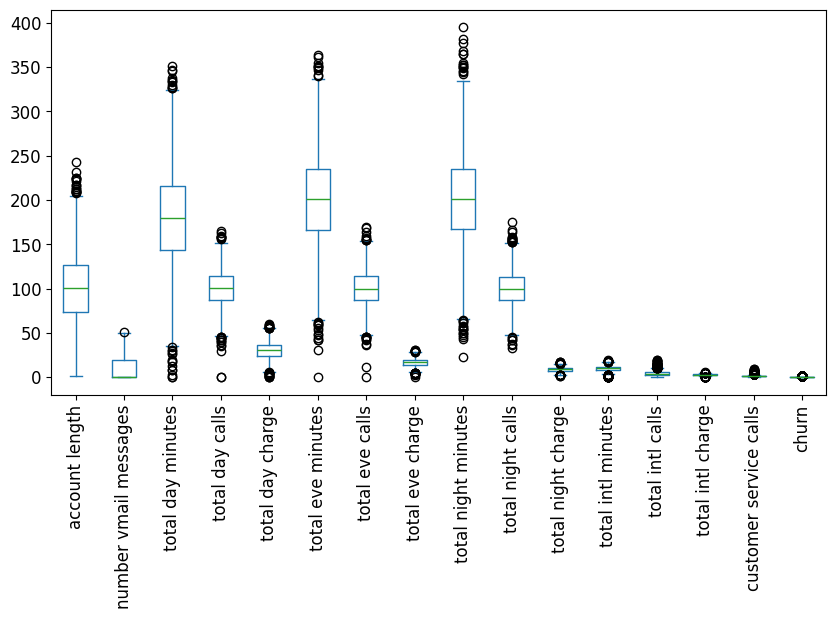

In [ ]:
df.plot.box(figsize=(10,5), rot=90, fontsize=12)

<Axes: >

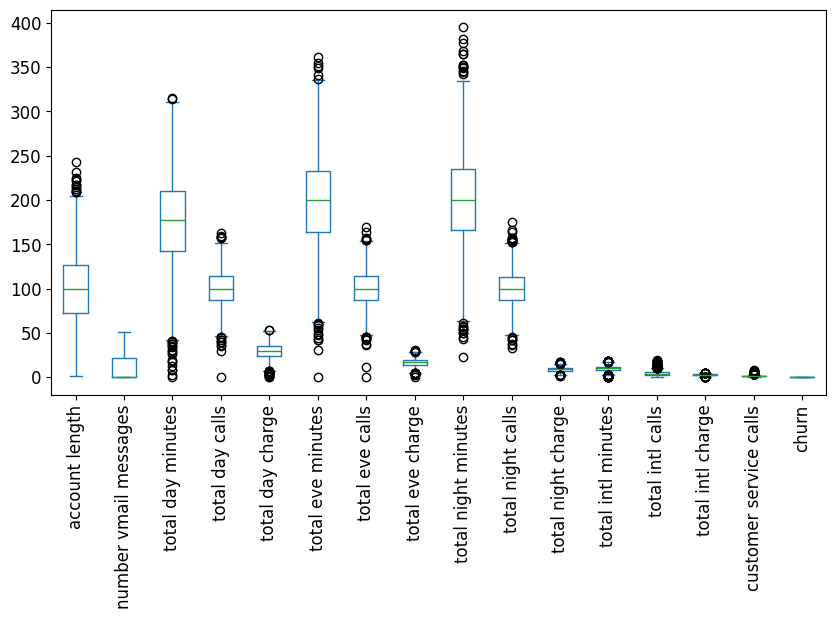

In [ ]:
df[df['churn'] == 0].plot.box(figsize=(10,5), rot=90, fontsize=12)

<Axes: >

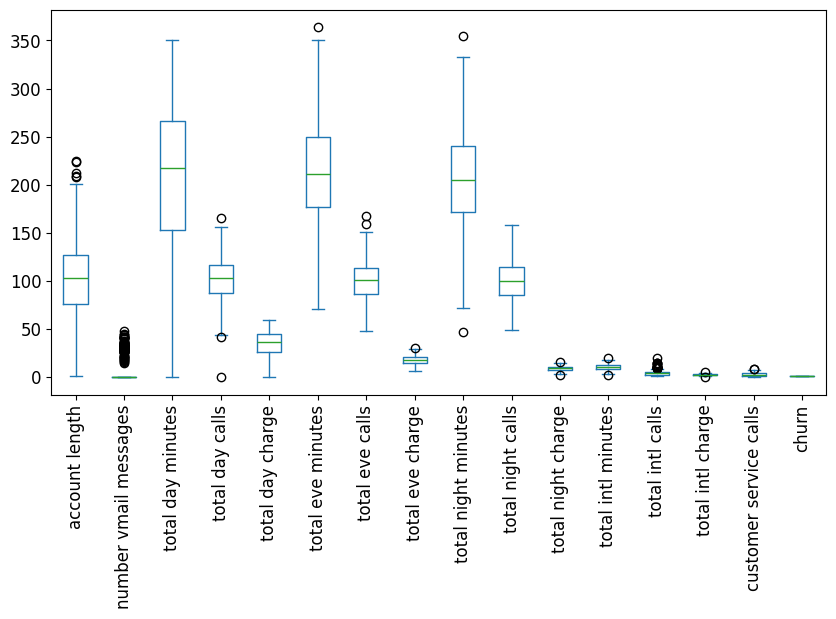

In [ ]:
df[df['churn'] == 1].plot.box(figsize=(10,5), rot=90, fontsize=12)

### Data types



**Categorial data** (type `object` and `bool`)

* Can be analyzed using value_counts()
* Best visualized by Bar plots

In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [ ]:
df.describe(include=['object', 'bool'])

,state,area code,phone number,international plan,voice mail plan
count,3333,3333,3333,3333,3333
unique,51,3,3333,2,2
top,WV,415,382-4657,no,no
freq,106,1655,1,3010,2411


Let’s have a look at the distribution of `Churn`:

In [ ]:
df['churn'].value_counts()

,count
churn,
0,2850
1,483


In [ ]:
df['churn'].value_counts()[0]/(len(df))

0.8550855085508551

2850 users out of 3333 are *loyal*; their `Churn` value is `0`.

To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [ ]:
df['churn'].value_counts(normalize=True)

,proportion
churn,
0,0.855086
1,0.144914


Let's visualize `area code` using bar plot

<Axes: title={'center': 'area code'}, xlabel='area code'>

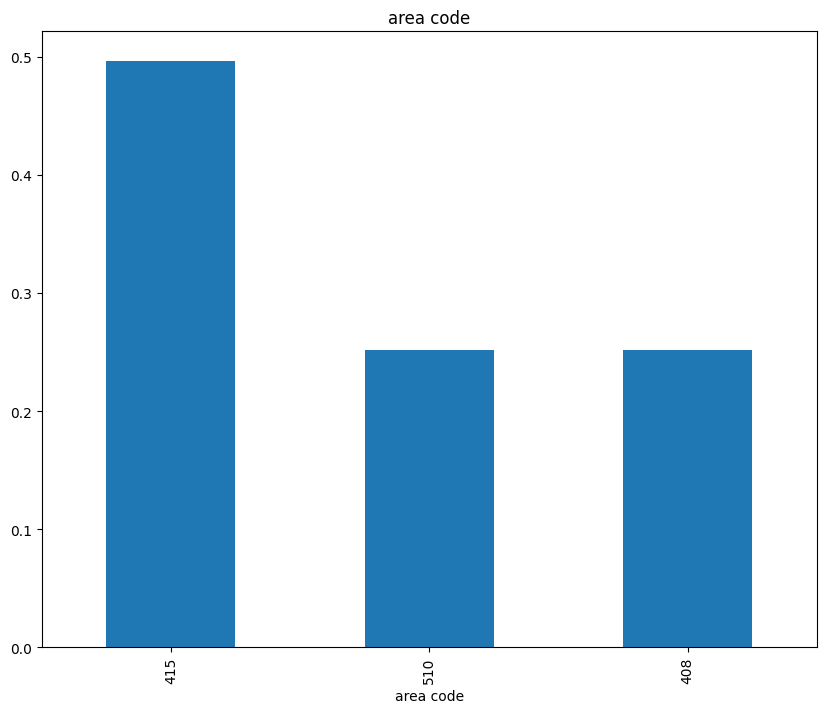

In [ ]:
df['area code'].value_counts(normalize=True).plot(kind = 'bar', title = "area code",figsize=(10,8))

**Numerical data**
* Best visualized by box plot or distribution plot (histogram)


<Axes: ylabel='Frequency'>

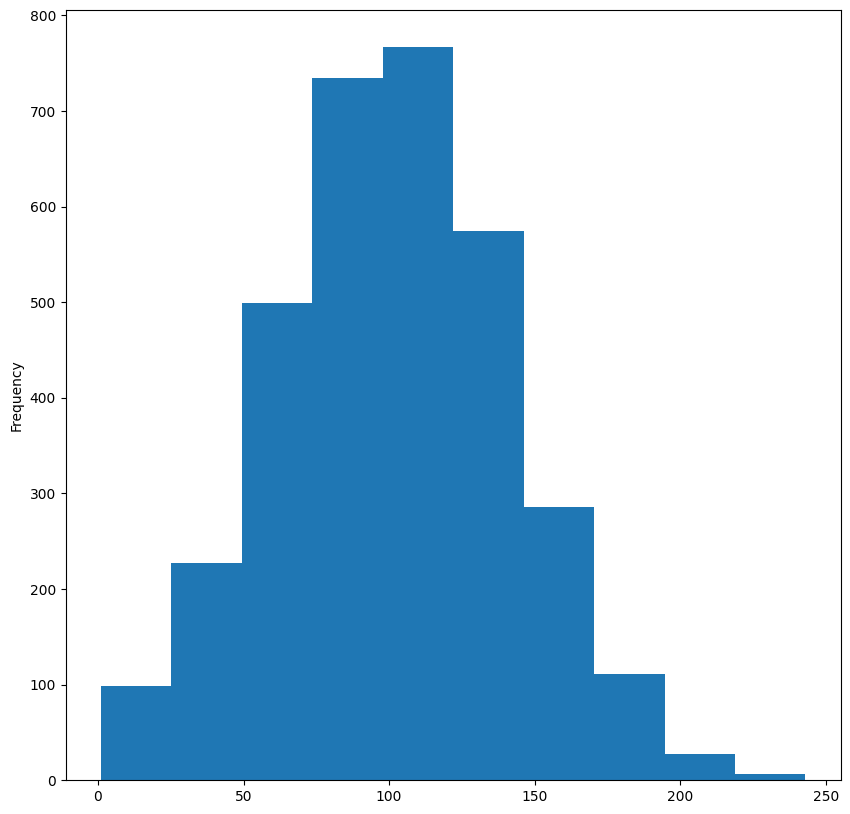

In [ ]:
df['account length'].plot.hist(figsize=(10,10))

<Axes: title={'center': 'total eve calls'}, xlabel='churn'>

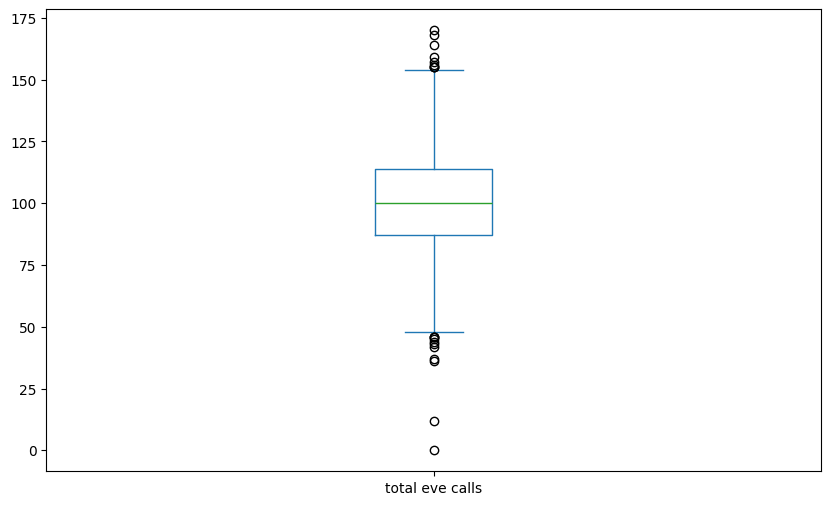

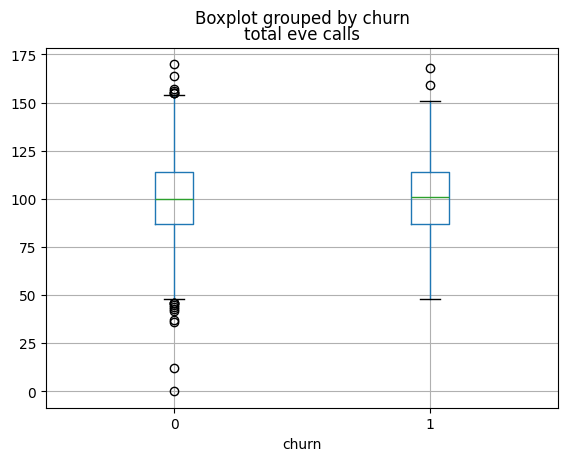

In [ ]:
# univariate
df['total eve calls'].plot.box(figsize=(10,6))

# bivariate
df.boxplot(column='total eve calls', by='churn')

**`datatime` data type**


Let's generate some fake customer signup dates so we can work with the `datetime` data type in Pandas

In [ ]:
import random
df['date joined'] = random.sample(pd.date_range('1995-01-01', '2019-01-01').tolist(),df.shape[0])

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,2000-08-06
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,2003-01-13
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,2010-11-03
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,2008-08-21
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1998-08-29





Now let's calcualte how much time had passed since the customer joined the service

In [ ]:
df['days since joined'] = (pd.to_datetime('today') - df['date joined']).dt.days

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined,days since joined
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,0,2000-08-06,8872
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,2003-01-13,7982
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,2010-11-03,5131
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,0,2008-08-21,5935
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,0,1998-08-29,9580


When did the first customer join? when was the latest time we signed up a customer?

In [ ]:
df['date joined'].min(), df['date joined'].max()

(Timestamp('1995-01-05 00:00:00'), Timestamp('2019-01-01 00:00:00'))

Find the date joined day of week distribution  

In [ ]:
pd.to_datetime(df['date joined']).dt.day_name().value_counts(normalize=True)

,proportion
date joined,
Sunday,0.152415
Friday,0.147015
Wednesday,0.146715
Tuesday,0.144614
Thursday,0.140414
Monday,0.139514
Saturday,0.129313


<Axes: xlabel='date joined'>

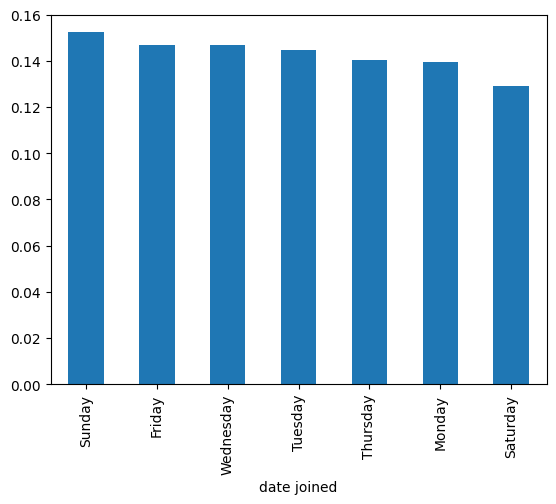

In [ ]:
pd.to_datetime(df['date joined']).dt.day_name().value_counts(normalize=True).plot.bar()

### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [ ]:
df.sort_values(by='total day charge', ascending=False).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined,days since joined
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,253.9,100,11.43,10.1,9,2.73,1,1,2008-04-14,6064
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,275.4,102,12.39,13.3,9,3.59,1,1,2015-05-10,3482
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,217.5,107,9.79,11.8,8,3.19,1,1,2004-01-13,7617
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,153.9,114,6.93,15.8,7,4.27,0,1,2009-08-05,5586
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,265.0,132,11.93,12.7,8,3.43,2,1,2005-07-10,7073


We can also sort by multiple columns:

In [ ]:
df.sort_values(by=['churn', 'total day charge'],
        ascending=[True, False]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined,days since joined
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,260.1,123,11.70,12.1,3,3.27,3,0,2004-10-13,7343
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,192.7,97,8.67,10.1,7,2.73,3,0,2017-05-29,2732
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,246.5,99,11.09,9.2,10,2.48,4,0,2014-03-21,3897
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,183.5,105,8.26,14.2,2,3.83,1,0,1996-10-27,10251
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,152.9,103,6.88,7.4,3,2.00,1,0,2010-08-11,5215


We can also sort by the ``DataFrame`` index using the `sort_index` function



In [ ]:
df.sort_index(ascending=False).head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined,days since joined
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,241.4,77,10.86,13.7,4,3.70,0,0,1998-06-03,9667
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,139.2,137,6.26,5.0,10,1.35,2,0,2011-02-28,5014
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,191.9,91,8.64,14.1,6,3.81,2,0,2000-04-21,8979
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,191.3,123,8.61,9.6,4,2.59,3,0,2017-06-21,2709
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,279.1,83,12.56,9.9,6,2.67,2,0,2001-02-07,8687
3327,SC,79,415,348-3830,no,no,0,134.7,98,22.90,...,221.4,128,9.96,11.8,5,3.19,2,0,1996-07-08,10362
3326,OH,96,415,347-6812,no,no,0,106.6,128,18.12,...,178.9,92,8.05,14.9,7,4.02,1,0,1998-12-12,9475
3325,OH,78,408,368-8555,no,no,0,193.4,99,32.88,...,243.3,109,10.95,9.3,4,2.51,2,0,2006-08-27,6660
3324,WV,159,415,377-1164,no,no,0,169.8,114,28.87,...,193.7,82,8.72,11.6,4,3.13,1,0,2010-05-17,5301
3323,IN,117,415,362-5899,no,no,0,118.4,126,20.13,...,227.0,56,10.22,13.6,3,3.67,5,1,1995-06-30,10736


To get a single column, you can use a `DataFrame['Name']` construction.

####Question 1
Let's use this to answer a question about that column alone:

**what is the proportion of churned users in our dataframe?**

####Answer 1

In [ ]:
## Your Answer

####Question 2
Let’s use it to answer the question:

**What are the average values of numerical features for churned users?**

####Answer 2

In [ ]:
## Your Answer

####Question 3

**How much time (on average) do churned users spend on the phone during daytime?**

Relevant column name: `total day minutes`

####Answer 3

In [ ]:
## Your Answer

####Question 4

**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**

Relevant columns names: `international plan`,` total intl minutes`

####Answer 4

In [ ]:
## Your Answer

####Indexing using `loc`


DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say **"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"**.

In the second case, we say **"give us the values of the first five rows in the first three columns"** (as in a typical Python slice: the maximal value is not included).


In [ ]:
df.loc[0:5, 'state':'area code']

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [ ]:
df.iloc[0:5, 0:3]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [ ]:
df[:1] # first line

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined,days since joined
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.7,1,0,2000-08-06,8872


In [ ]:
df[-1:] # last line

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined,days since joined
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,241.4,77,10.86,13.7,4,3.7,0,0,1998-06-03,9667



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [ ]:
df.apply(np.max)

,0
state,WY
account length,243
area code,510
phone number,422-9964
international plan,yes
voice mail plan,yes
number vmail messages,51
total day minutes,350.8
total day calls,165
total day charge,59.64


The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1` or aplly on a specific column. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with W, we can do it like this:

In [ ]:
df[df['state'].apply(lambda state: state[0] == 'W')].head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined,days since joined
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,326.4,97,14.69,11.2,5,3.02,0,0,1999-08-18,9226
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,182.7,115,8.22,9.5,3,2.57,0,0,2001-06-15,8559
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,265.3,86,11.94,3.5,3,0.95,1,0,2003-06-25,7819
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,70.6,79,3.18,11.0,3,2.97,1,0,2001-03-02,8664
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,203.9,127,9.18,9.7,3,2.62,5,1,2012-10-02,4432


Let's define a lambda function that removes the hyphen(-) from the phone numbers and apply it over the entire phone-number column

In [ ]:
df['phone number'] = df['phone number'].apply(lambda x: x.replace('-',''))

In [ ]:
df['phone number']

,phone number
0,3824657
1,3717191
2,3581921
3,3759999
4,3306626
...,...
3328,4144276
3329,3703271
3330,3288230
3331,3646381


Let's normalize the values of an entire row  by applying a *max* normalization using the `normalize` function provided by sklearn  

In [ ]:
from sklearn.preprocessing import normalize
# apply on a row
df.select_dtypes(include=['int64']).apply(lambda x: normalize([x], norm="max"), axis=1)

,0
0,"[[0.014427412082957619, 0.00281785392245266, 0..."
1,"[[0.01340516161363067, 0.003257328990228013, 0..."
2,"[[0.026700448255700643, 0.0, 0.022217891249269..."
3,"[[0.014153327716933445, 0.0, 0.011962931760741..."
4,"[[0.007828810020876827, 0.0, 0.011795407098121..."
...,...
3328,"[[0.022101991481524117, 0.004144123402785772, ..."
3329,"[[0.025101513473606497, 0.0, 0.021040974529346..."
3330,"[[0.003118387348257044, 0.0, 0.012139436462857..."
3331,"[[0.03669724770642202, 0.0, 0.0209413641802951..."


The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [ ]:
df['international plan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
d = {'no' : False, 'yes' : True}
df['international plan'] = df['international plan'].map(d)
df['international plan'].unique()

array([False,  True])

And it can also be done with `np.where()` function

In [ ]:
df['voice mail plan'] = np.where(df['voice mail plan']==True,1,0)
df['voice mail plan'].unique()

array([1, 0])

In [ ]:
df['voice mail plan'].dtype

dtype('int64')


### Grouping


In general, grouping data in Pandas works as follows:


```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [ ]:
columns_to_show = ['total day minutes', 'total eve minutes',
                   'total night minutes']

df.groupby(['churn'])[columns_to_show].describe(percentiles=[0.25, .95])

total day minutes                                                       \
                  count        mean        std  min      25%    50%      95%   
churn                                                                          
0                2850.0  175.175754  50.181655  0.0  142.825  177.2  254.155   
1                 483.0  206.914079  68.997792  0.0  153.250  217.6  311.660   

             total eve minutes              ...                 \
         max             count        mean  ...     95%    max   
churn                                       ...                  
0      315.6            2850.0  199.043298  ...  281.10  361.8   
1      350.8             483.0  212.410145  ...  300.81  363.7   

      total night minutes                                               \
                    count        mean        std   min     25%     50%   
churn                                                                    
0                  2850.0  200.133193  51.105032  23.2  165.90  200.25   
1                   483.0  205.231677  47.132825  47.4  171.25  204.80   

                      
          95%    max  
churn                 
0      282.71  395.0  
1      283.32  354.9  

[2 rows x 24 columns]


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:



In [ ]:
pd.crosstab(df['churn'], df['international plan'], margins=True)

international plan,False,True,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [ ]:
pd.crosstab(df['churn'], df['voice mail plan'], normalize=True, margins=True)

voice mail plan,0,1,All
churn,,,
0,0.602460,0.252625,0.855086
1,0.120912,0.024002,0.144914
All,0.723372,0.276628,1.000000


We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let’s take a look at the average number of day, evening, and night calls by area code:

In [ ]:
df.pivot_table(['total day calls', 'total eve calls', 'total night calls'],
               ['area code', 'churn'], aggfunc='mean')

total day calls  total eve calls  total night calls
area code churn                                                     
408       0           100.101955       100.019553          99.276536
          1           102.811475        98.434426          97.647541
415       0           100.606765       100.391121         100.294574
          1           100.394068       101.182203         101.021186
510       0            99.822378        99.358042         100.372028
          1           101.672000       101.464000         101.912000

### DataFrame transformations

#### Adding rows and columns

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users


# Let’s add a `total_calls` column

Relevant columns: `total day calls`, `total eve calls`, `total night calls`, `total intl calls`


create the `total_calls` Series and paste it into the DataFrame

In [ ]:
total_calls = df['total day calls'] + df['total eve calls'] + \
              df['total night calls'] + df['total intl calls']
df.insert(loc=len(df.columns), column='total calls', value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,date joined,days since joined,total calls
0,KS,128,415,3824657,False,1,25,265.1,110,45.07,...,91,11.01,10.0,3,2.70,1,0,2000-08-06,8872,303
1,OH,107,415,3717191,False,1,26,161.6,123,27.47,...,103,11.45,13.7,3,3.70,1,0,2003-01-13,7982,332
2,NJ,137,415,3581921,False,0,0,243.4,114,41.38,...,104,7.32,12.2,5,3.29,0,0,2010-11-03,5131,333
3,OH,84,408,3759999,True,0,0,299.4,71,50.90,...,89,8.86,6.6,7,1.78,2,0,2008-08-21,5935,255
4,OK,75,415,3306626,True,0,0,166.7,113,28.34,...,121,8.41,10.1,3,2.73,3,0,1998-08-29,9580,359


####Question 1

**Let’s add a `total charge` column**

Relevant columns: `total day charge`, `total eve charge`, `total night charge`, `total intl charge`

#### Answer 1

It is possible to add a column more easily without creating an intermediate Series instance.

Let's do it to create `total charge` column using `total day charge`, `total eve charge`, `total night charge`, `total intl charge`


In [ ]:
## Your Answer

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   state                   3333 non-null   object        
 1   account length          3333 non-null   int64         
 2   area code               3333 non-null   object        
 3   phone number            3333 non-null   object        
 4   international plan      3333 non-null   bool          
 5   voice mail plan         3333 non-null   int64         
 6   number vmail messages   3333 non-null   int64         
 7   total day minutes       3333 non-null   float64       
 8   total day calls         3333 non-null   int64         
 9   total day charge        3333 non-null   float64       
 10  total eve minutes       3333 non-null   float64       
 11  total eve calls         3333 non-null   int64         
 12  total eve charge        3333 non-null   float64 

If needed - remove duplicated rows using Panda's `drop_duplicates` function

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   state                   3333 non-null   object        
 1   account length          3333 non-null   int64         
 2   area code               3333 non-null   object        
 3   phone number            3333 non-null   object        
 4   international plan      3333 non-null   bool          
 5   voice mail plan         3333 non-null   int64         
 6   number vmail messages   3333 non-null   int64         
 7   total day minutes       3333 non-null   float64       
 8   total day calls         3333 non-null   int64         
 9   total day charge        3333 non-null   float64       
 10  total eve minutes       3333 non-null   float64       
 11  total eve calls         3333 non-null   int64         
 12  total eve charge        3333 non-null   float64 

To update a cell in the `DataFrame` use `loc` with the coordinates of the cell to by modified.  

In [ ]:
print ("Before update: {}".format(df.loc[0,'total intl charge']))
df.loc[0,'total intl charge'] = 4.4
print ("After update: {}".format(df.loc[0,'total intl charge']))

Before update: 2.7
After update: 4.4


Referncing a particular cell is also possible using iloc and requires fetching the positional of the row and column to be changed.

For instance let's set the second to last value of the *total charge* series:

In [ ]:
print ("Before update: {}".format(df.iloc[-2, df.columns.get_loc('total charge')]))
df.iloc[-2, df.columns.get_loc('total charge')] = 0
print ("After update: {}".format(df.iloc[-2, df.columns.get_loc('total charge')]))

Before update: 57.53
After update: 0.0


####Question 2

**let's update the elements of the *total charge* series where the element value is *not* greater than the series median value.**

#### Answer 2

In [ ]:
## Your Answer

####Textual data

We might want to do transformations specific to textual data (`str` type).

For example, we can choose to convert to a lowercase or uppercase style, remove digits or remove punctuations.

A good source for tools to work with text is Regex: https://www.regexbuddy.com/

Our current data does not include many text, but in the final project we will have text columns. A tutorial for EDA for textual data is: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/#2

In [ ]:
df['state']

,state
0,KS
1,OH
2,NJ
3,OH
4,OK
...,...
3328,AZ
3329,WV
3330,RI
3331,CT


In [ ]:
df['state']=df['state'].apply(lambda x: x.lower())
df['state']

,state
0,ks
1,oh
2,nj
3,oh
4,ok
...,...
3328,az
3329,wv
3330,ri
3331,ct


### Correlations
Finding a correlation between numerical variables in the dataset.


In [ ]:
df_numeric = df.select_dtypes(include=['number'])
correlation_mat = df_numeric.corr()
correlation_mat

,account length,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,days since joined
account length,1.000000,0.002918,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009996,-0.003796,0.016541,-0.026573
voice mail plan,0.002918,1.000000,0.956927,-0.001684,-0.011086,-0.001686,0.021545,-0.006444,0.021559,0.006079,0.015553,0.006064,-0.001318,0.007618,-0.000182,-0.017824,-0.102148,-0.000463
number vmail messages,-0.004628,0.956927,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.003717,-0.013263,-0.089728,-0.000908
total day minutes,0.006216,-0.001684,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.009025,-0.013423,0.205151,-0.011225
total day calls,0.038470,-0.011086,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021973,-0.018942,0.018459,0.013562
total day charge,0.006214,-0.001686,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.009027,-0.013427,0.205151,-0.011219
total eve minutes,-0.006757,0.021545,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011107,-0.012985,0.092796,-0.002558
total eve calls,0.019260,-0.006444,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008630,0.002423,0.009233,-0.014924
total eve charge,-0.006745,0.021559,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011114,-0.012987,0.092786,-0.002550
total night minutes,-0.008955,0.006079,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.014583,-0.009288,0.035493,0.010793


We can also look at the correlation between all numeric variables and the target variable

<ipython-input-273-8d4335e4c834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor_to_target.sort_values(by='churn', inplace=True)


<Axes: >

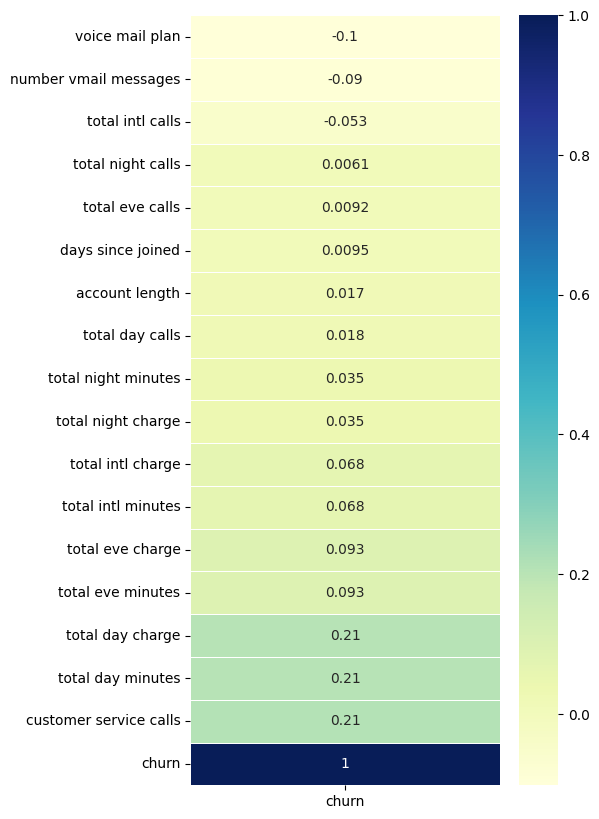

In [ ]:
cor_to_target = correlation_mat[['churn']]
cor_to_target.sort_values(by='churn', inplace=True)
plt.figure(figsize=(5,10))
sns.heatmap(cor_to_target, annot=True,linewidths=.5,cmap="YlGnBu")